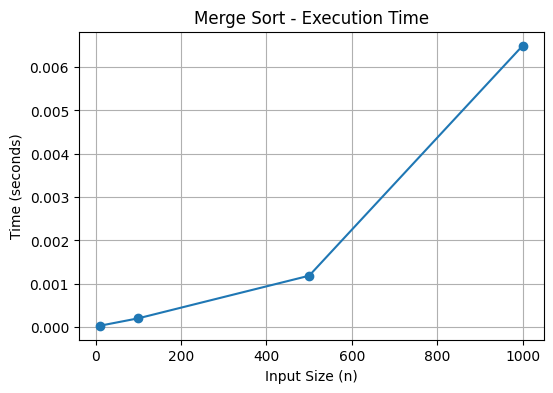

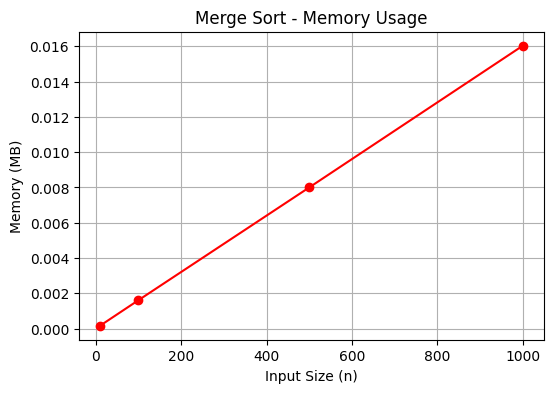

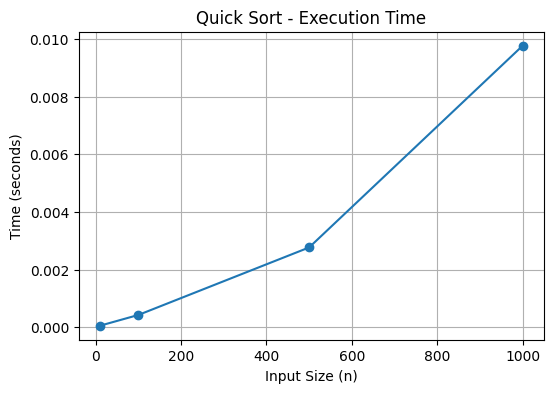

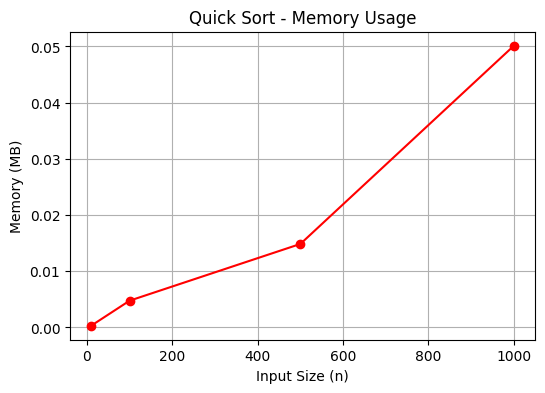

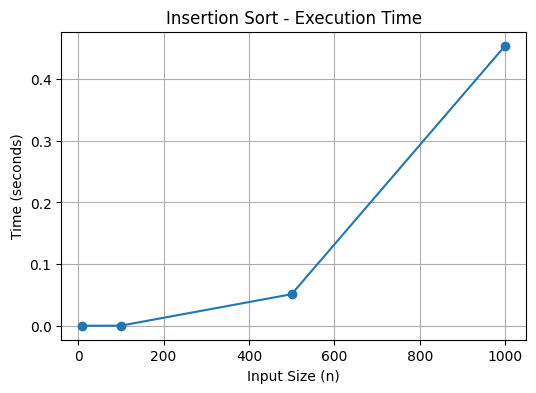

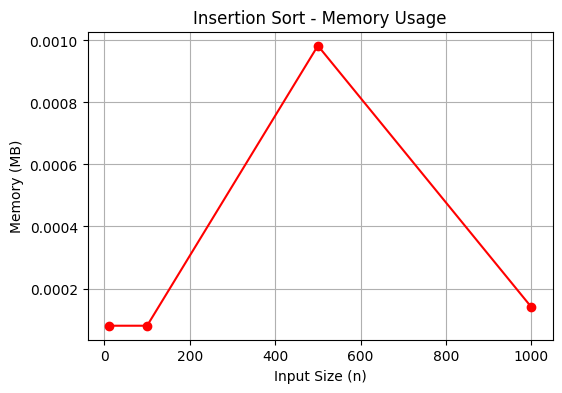

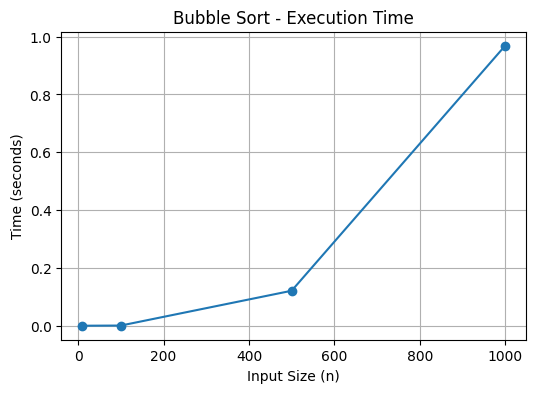

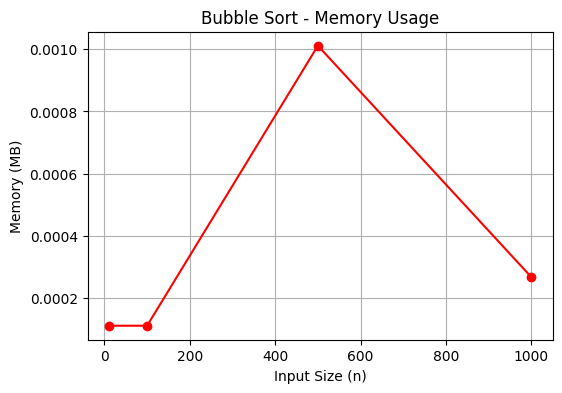

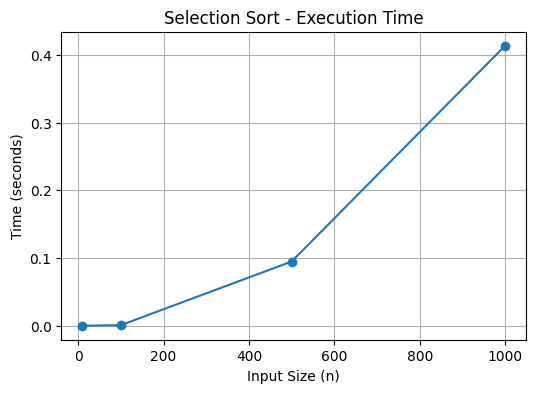

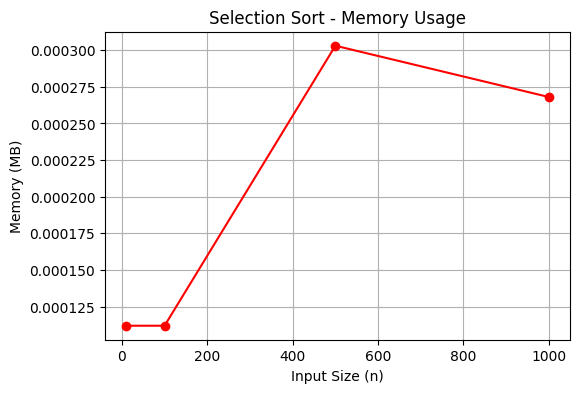

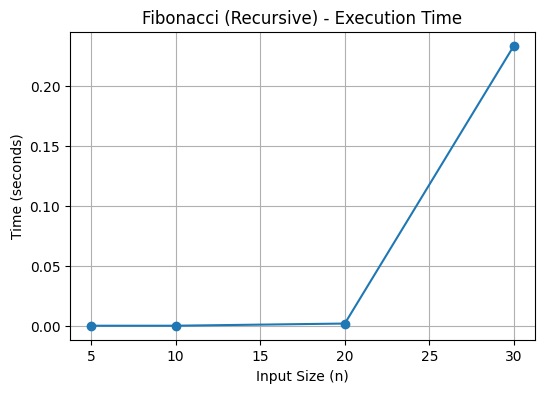

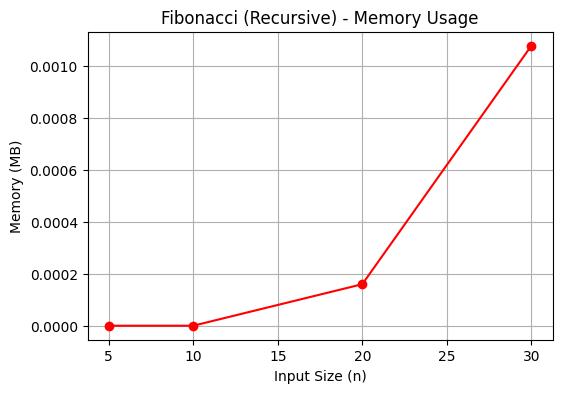

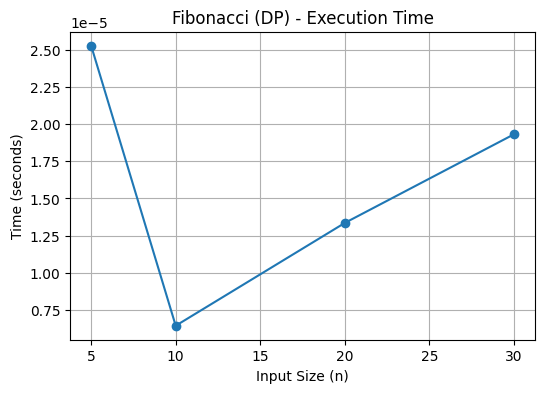

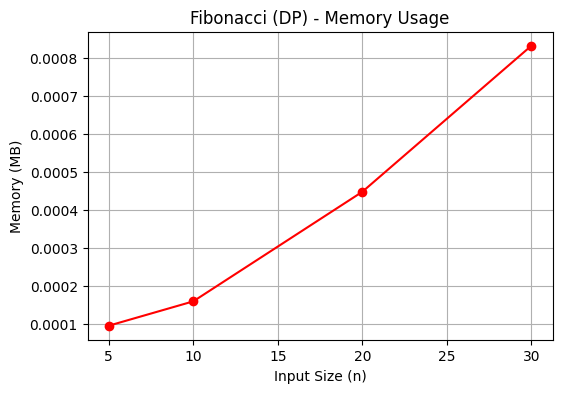

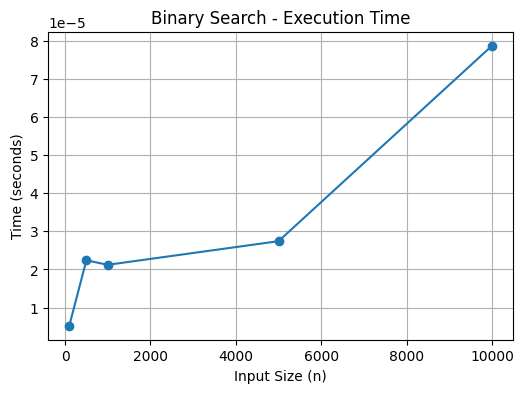

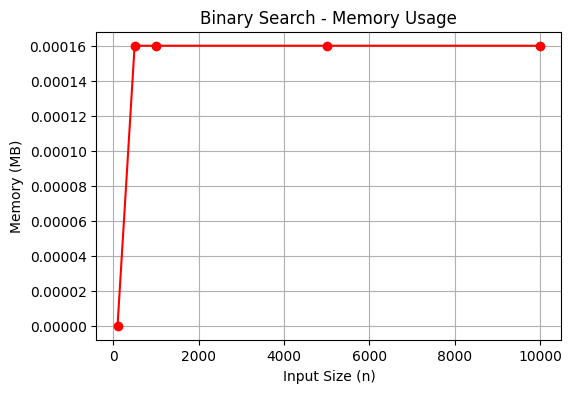

In [1]:
import time
import tracemalloc
import matplotlib.pyplot as plt
import random

# --------------------------
# Algorithm Implementations
# --------------------------

# Fibonacci (Naive Recursive)
def fib_recursive(n):
    if n <= 1:
        return n
    return fib_recursive(n-1) + fib_recursive(n-2)

# Fibonacci (DP)
def fib_dp(n):
    dp = [0, 1]
    for i in range(2, n+1):
        dp.append(dp[i-1] + dp[i-2])
    return dp[n]

# Merge Sort
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr)//2
        L = arr[:mid]
        R = arr[mid:]
        merge_sort(L)
        merge_sort(R)

        i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
    return arr

# Quick Sort
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[0]
    left = [x for x in arr[1:] if x <= pivot]
    right = [x for x in arr[1:] if x > pivot]
    return quick_sort(left) + [pivot] + quick_sort(right)

# Insertion Sort
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = key
    return arr

# Bubble Sort
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

# Selection Sort
def selection_sort(arr):
    for i in range(len(arr)):
        min_idx = i
        for j in range(i+1, len(arr)):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

# Binary Search
def binary_search(arr, target):
    left, right = 0, len(arr)-1
    while left <= right:
        mid = (left + right)//2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1


# --------------------------
# Profiling Utility
# --------------------------

def profile_algorithm(algorithm, generator, sizes, algo_name, search=False):
    times = []
    memories = []

    for n in sizes:
        data = generator(n)
        if search:
            data.sort()
            target = data[-1]  # always search for largest element

        tracemalloc.start()
        start_time = time.time()

        if search:
            algorithm(data, target)
        else:
            algorithm(data)

        end_time = time.time()
        current, peak = tracemalloc.get_traced_memory()
        tracemalloc.stop()

        times.append(end_time - start_time)
        memories.append(peak / 10**6)  # Convert to MB

    # Plot execution time
    plt.figure(figsize=(6,4))
    plt.plot(sizes, times, marker="o", label="Execution Time")
    plt.title(f"{algo_name} - Execution Time")
    plt.xlabel("Input Size (n)")
    plt.ylabel("Time (seconds)")
    plt.grid(True)
    plt.show()

    # Plot memory usage
    plt.figure(figsize=(6,4))
    plt.plot(sizes, memories, marker="o", color="red", label="Memory Usage")
    plt.title(f"{algo_name} - Memory Usage")
    plt.xlabel("Input Size (n)")
    plt.ylabel("Memory (MB)")
    plt.grid(True)
    plt.show()


# --------------------------
# Run Profiling
# --------------------------

sizes_sorting = [10, 100, 500, 1000]   # You can extend to larger inputs
sizes_fib = [5, 10, 20, 30]
sizes_search = [100, 500, 1000, 5000, 10000]

# Sorting Algorithms
profile_algorithm(merge_sort, lambda n: random.sample(range(n*10), n), sizes_sorting, "Merge Sort")
profile_algorithm(quick_sort, lambda n: random.sample(range(n*10), n), sizes_sorting, "Quick Sort")
profile_algorithm(insertion_sort, lambda n: random.sample(range(n*10), n), sizes_sorting, "Insertion Sort")
profile_algorithm(bubble_sort, lambda n: random.sample(range(n*10), n), sizes_sorting, "Bubble Sort")
profile_algorithm(selection_sort, lambda n: random.sample(range(n*10), n), sizes_sorting, "Selection Sort")

# Fibonacci
profile_algorithm(fib_recursive, lambda n: n, sizes_fib, "Fibonacci (Recursive)")
profile_algorithm(fib_dp, lambda n: n, sizes_fib, "Fibonacci (DP)")

# Binary Search
profile_algorithm(binary_search, lambda n: random.sample(range(n*10), n), sizes_search, "Binary Search", search=True)
